In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings


In [62]:
# Function to return metrics
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

def get_model_metrics(model_name, y_true, y_pred):
    metrics = {}
    metrics['Model'] = model_name
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['ROC-AUC Score'] = roc_auc_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred)
    metrics['Recall'] = recall_score(y_true, y_pred)
    metrics['F1-Score'] = f1_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)

    return metrics

In [63]:
metrics_table = list()

In [64]:
df1 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/ARP_MitM_sampled.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Active_Wiretap_sampled.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Fuzzing_sampled.csv')
df4 = pd.read_csv("https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Mirai_sampled.csv")
df5 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/OS_Scan_sampled.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SSDP_Flood_sampled.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SSL_Renegotiation_sampled.csv')
df8 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SYN_DoS_sampled.csv')
df9 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Video_Injection_sampled.csv')

In [65]:
df1 = df1.drop(['Unnamed: 0',	'index'], axis=1)
df1.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,...,179786.099514,0.0,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0
1,1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,...,181996.614142,0.0,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0


In [66]:
df2 = df2.drop(['Unnamed: 0',	'index'], axis=1)
df2.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,163.049513,1306.129759,133895.850037,283.632401,1305.573004,133300.917659,871.595910,1300.438768,137735.237195,...,57217.762833,1.914975e-09,1.143837e-07,27911.418879,1227.676709,237.573391,1229.142248,56441.116252,0.221214,0.001032
1,1,174.527618,1295.076626,145592.073006,295.358524,1297.920763,141931.132312,883.612806,1297.616196,140815.653256,...,183926.684931,0.000000e+00,0.000000e+00,26755.578455,1334.536548,427.019985,1335.884650,182346.067560,0.000000,0.000000


In [67]:
df3 = df3.drop(['Unnamed: 0',	'index'], axis=1)
df3.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,183.422791,1336.527256,190462.742960,291.849930,1336.289854,189878.320827,850.126451,1336.942110,187900.563560,...,179608.126627,0.0,0.0,28076.951594,1340.929813,425.522919,1340.929813,181069.754307,0.0,0.0
1,1,237.879413,1356.333015,175809.072163,346.842926,1347.008011,183339.520567,903.558706,1340.022021,187013.751527,...,183211.967235,0.0,0.0,28082.917849,1340.514610,426.459844,1340.514610,181867.998735,0.0,0.0


In [68]:
df4 = df4.drop(['0'], axis=1)
df4 = df4.drop(['Unnamed: 0',	'index'], axis=1)
df4.head(2)

,x,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,1,112.097168,60.035565,0.739410,153.541719,60.066094,1.315846,361.114006,60.101399,1.764327,...,5.002221e-12,0.0,0.0,20727.018620,60.0,0.000010,60.0,9.276846e-11,0.0,0.0
1,1,117.742473,60.138909,1.829893,162.204865,60.210187,2.786475,376.574119,60.236818,3.256390,...,4.092726e-12,0.0,0.0,22446.495481,60.0,0.000006,60.0,4.001777e-11,0.0,0.0


In [69]:
df5 = df5.drop(['Unnamed: 0',	'index'], axis=1)
df5.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,1,774.199578,60.0,5.002221e-12,1172.275787,60.0,8.640200e-12,3044.228765,60.0,2.273737e-12,...,0.0,0.0,0.0,1.0,60.0,0.0,60.000000,0.0,0.0,0.0
1,1,732.896796,60.0,8.185452e-12,1160.217723,60.0,1.364242e-12,3296.988952,60.0,3.592504e-11,...,0.0,0.0,0.0,1.0,60.0,0.0,84.852814,0.0,0.0,0.0


In [70]:
df6 = df6.drop(['Unnamed: 0',	'index'], axis=1)
df6.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,1.997162,830.381872,385019.472302,1.998296,830.029123,385019.970028,1.999432,829.676374,385020.218892,...,0.000000,0.0,0.0,1.000000,1450.000000,0.0,1450.000000,0.00,0.0,0.0
1,0,2.996940,586.005354,375805.676539,2.998163,585.869927,375719.284013,2.999387,585.734436,375632.816999,...,3080.249997,0.0,0.0,1.999994,153.499836,55.5,153.499836,3080.25,0.0,0.0


In [71]:
df7 = df7.drop(['Unnamed: 0',	'index'], axis=1)
df7.head(3)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,201.933924,751.076479,448315.216282,267.334718,749.056876,445832.685644,603.764783,745.692054,441529.126214,...,33157.526501,0.000000e+00,0.000000e+00,5889.520552,147.270744,179.537822,147.270744,32233.829699,0.000000e+00,0.000000e+00
1,0,275.855663,745.492465,441894.936067,408.565730,744.033612,439475.223524,1090.770627,742.309873,436848.814508,...,30043.252662,0.000000e+00,0.000000e+00,17746.423096,150.873977,179.105631,150.873977,32078.826919,0.000000e+00,0.000000e+00
2,0,45.069225,1416.091201,31374.311828,78.276855,1416.709773,30919.455107,253.852811,1412.537252,34984.757411,...,35626.304470,5.470622e-12,1.109738e-08,16501.769970,1411.756991,184.838747,1413.031423,34165.362231,1.418180e-11,1.060973e-08


In [72]:
df8 = df8.drop(['Unnamed: 0',	'index'], axis=1)
df8.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,1.999868,773.955314,456975.998003,1.999921,773.973188,456975.999281,1.999974,773.991063,456975.999920,...,0.000000e+00,0.0,0.0,1.000000,98.0,0.000000,98.0,0.000000e+00,0.0,0.0
1,0,2.998371,999.425957,406159.137822,2.999023,999.388902,406175.842945,2.999674,999.351854,406192.541806,...,9.313226e-10,0.0,0.0,1.999998,1450.0,0.000022,1450.0,4.656613e-10,0.0,0.0


In [73]:
df9 = df9.drop(['Unnamed: 0',	'index'], axis=1)
df9.head(2)

,x,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,0,1.995812,862.869190,425754.375319,1.997485,862.321515,425755.575114,1.999161,861.773838,425756.175013,...,425756.249250,0.0,0.0,1.999992,861.502738,652.500000,861.502738,425756.249993,0.0,0.0
1,0,2.995771,1080.219198,377918.162404,2.997460,1079.731725,378131.164377,2.999153,1079.243977,378343.810605,...,378439.385077,0.0,0.0,2.999992,1079.002440,615.182037,1079.002440,378448.938548,0.0,0.0


In [74]:
df1.columns = ['feature_'+str(i) for i in range(0,116)]
df2.columns = ['feature_'+str(i) for i in range(0,116)]
df3.columns = ['feature_'+str(i) for i in range(0,116)]
df4.columns = ['feature_'+str(i) for i in range(0,116)]
df5.columns = ['feature_'+str(i) for i in range(0,116)]
df6.columns = ['feature_'+str(i) for i in range(0,116)]
df7.columns = ['feature_'+str(i) for i in range(0,116)]
df8.columns = ['feature_'+str(i) for i in range(0,116)]
df9.columns = ['feature_'+str(i) for i in range(0,116)]

In [75]:
df1['attack']=1
df2['attack']=2
df3['attack']=3
df4['attack']=4
df5['attack']=5
df6['attack']=6
df7['attack']=7
df8['attack']=8
df9['attack']=9

In [76]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [77]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack
0,1,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,...,0.0,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0,1
1,1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,...,0.0,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0,1
2,1,379.466053,1347.077216,172679.023477,633.858286,1345.691594,175484.443945,1942.359870,1342.632301,179854.874354,...,0.0,0.0,27751.882884,1341.513646,424.904429,1341.513646,180543.774059,0.0,0.0,1
3,1,428.413637,1335.090314,193351.408058,681.055680,1333.676220,190797.906136,1971.296012,1337.078715,183403.845860,...,0.0,0.0,27948.812569,1341.115622,425.224505,1341.115622,180815.879583,0.0,0.0,1
4,1,151.173948,1279.523342,157603.223345,269.501602,1286.223631,151292.562593,855.352870,1290.355020,147041.015366,...,0.0,0.0,28174.860496,1334.685469,426.811681,1334.685469,182168.211433,0.0,0.0,1


In [78]:
df.columns = ['feature_'+str(i) for i in range(len(df.columns))]

In [79]:
df.columns.values[0]='label'
df.columns.values[-1]='attack'

In [80]:
cols = list(df)[1:]
cols.append('label')
df = df[cols]

In [81]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,162.251328,1287.930495,137946.585241,277.376266,1290.621872,139699.421710,862.105671,1294.355651,140928.760080,8708.282524,...,0.0,28128.538982,1335.626000,425.845352,1335.626000,181344.263583,0.0,0.0,1,1
1,387.752010,1306.058869,220121.097478,637.303410,1316.728781,207438.876258,1924.246172,1331.715608,189917.368904,19614.490170,...,0.0,28051.498932,1340.999983,425.651549,1340.999983,181179.241248,0.0,0.0,1,1
2,379.466053,1347.077216,172679.023477,633.858286,1345.691594,175484.443945,1942.359870,1342.632301,179854.874354,19641.527990,...,0.0,27751.882884,1341.513646,424.904429,1341.513646,180543.774059,0.0,0.0,1,1
3,428.413637,1335.090314,193351.408058,681.055680,1333.676220,190797.906136,1971.296012,1337.078715,183403.845860,18836.905420,...,0.0,27948.812569,1341.115622,425.224505,1341.115622,180815.879583,0.0,0.0,1,1
4,151.173948,1279.523342,157603.223345,269.501602,1286.223631,151292.562593,855.352870,1290.355020,147041.015366,8714.034018,...,0.0,28174.860496,1334.685469,426.811681,1334.685469,182168.211433,0.0,0.0,1,1


In [82]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,...,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,1.799400e+04,17994.000000,17994.000000,17998.000000,17998.000000
mean,590.001582,857.763041,179333.709871,971.216290,858.429179,178754.480328,2849.822370,859.490195,177962.861751,26083.685756,...,-0.000052,15135.163135,860.338704,220.391662,911.752972,8.622016e+04,-0.642570,-0.000201,4.999889,0.350317
std,1672.259132,525.861139,157456.903472,2786.477502,526.194303,157135.199378,8352.314584,526.723421,156845.310038,79552.427675,...,0.004580,12685.595423,608.959023,189.612557,590.260119,8.274561e+04,24.555470,0.006196,2.582183,0.477082
min,1.000000,52.000000,0.000000,1.000000,52.000000,0.000000,1.000000,52.000000,0.000000,1.000000,...,-0.276309,1.000000,52.000000,0.000000,52.000000,0.000000e+00,-2011.316691,-0.314397,1.000000,0.000000
25%,56.061229,136.000000,225.624024,86.288658,136.000000,304.027158,200.777767,136.000000,415.872886,1356.221785,...,0.000000,72.628172,136.000000,0.000007,150.507101,9.313226e-10,0.000000,0.000000,3.000000,0.000000
50%,139.743726,1231.631585,170520.674718,216.059493,1234.975971,173093.596850,574.416212,1236.700796,177195.319543,5216.721656,...,0.000000,17303.812382,1334.520728,221.765288,1335.198361,5.275406e+04,0.000000,0.000000,5.000000,0.000000
75%,243.685256,1328.156284,222725.513399,381.475034,1331.337628,213747.656584,1089.506496,1335.374246,204456.933708,10379.729109,...,0.000000,27960.225050,1341.307654,425.192396,1341.489508,1.807886e+05,0.000000,0.000000,7.000000,1.000000
max,7436.865335,1452.000000,488785.862233,12392.617904,1452.000000,488812.666765,37163.978483,1452.000000,488832.368521,354099.847565,...,0.347487,41243.896714,1452.000000,699.170575,1452.000000,4.888395e+05,3.472361,0.405684,9.000000,1.000000


In [83]:
df_null = df[df.isna().any(axis=1)]
df_null

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1


In [84]:
df = df.dropna()
df_null = df[df.isna().any(axis=1)]
df_null

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label


In [85]:
from google.colab import files
# Save the DataFrame to an Excel file
df.to_excel('output.xlsx', index=False)
# Download the Excel file to our local system
files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
df.shape

(17994, 117)

In [87]:
from sklearn.preprocessing import MinMaxScaler

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
df_scaled = MinMaxScaler().fit_transform(df)

#view first five rows of scaled DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = list(df))
df_scaled.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,0.021686,0.882807,0.282223,0.022303,0.884730,0.285793,0.023171,0.887397,0.288297,0.024590,...,0.442948,0.681997,0.916876,0.609072,0.916876,0.370969,0.998277,0.436614,0.0,1.0
1,0.052012,0.895756,0.450343,0.051350,0.903378,0.424373,0.051752,0.914083,0.388512,0.055390,...,0.442948,0.680129,0.920714,0.608795,0.920714,0.370631,0.998277,0.436614,0.0,1.0
2,0.050897,0.925055,0.353282,0.051071,0.924065,0.359001,0.052239,0.921880,0.367928,0.055466,...,0.442948,0.672865,0.921081,0.607726,0.921081,0.369331,0.998277,0.436614,0.0,1.0
3,0.057480,0.916493,0.395575,0.054880,0.915483,0.390329,0.053018,0.917913,0.375188,0.053194,...,0.442948,0.677639,0.920797,0.608184,0.920797,0.369888,0.998277,0.436614,0.0,1.0
4,0.020196,0.876802,0.322438,0.021668,0.881588,0.309510,0.022989,0.884539,0.300800,0.024606,...,0.442948,0.683120,0.916204,0.610454,0.916204,0.372654,0.998277,0.436614,0.0,1.0


In [88]:
from scipy import stats
import pandas as pd
import numpy as np
z_scores = np.abs(stats.zscore(df_scaled, nan_policy='omit'))
z_scores = pd.DataFrame(z_scores, columns=df_scaled.columns)
z_scores.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,0.255799,0.818048,0.262855,0.249009,0.821379,0.248551,0.237991,0.825628,0.236125,0.218421,...,0.011281,1.024291,0.780513,1.083575,0.718132,1.149629,0.026169,0.032363,1.548927,1.361922
1,0.120947,0.852522,0.259046,0.119837,0.870994,0.182551,0.110820,0.896559,0.076221,0.081322,...,0.011281,1.018217,0.789338,1.082553,0.727237,1.147635,0.026169,0.032363,1.548927,1.361922
2,0.125902,0.930527,0.042265,0.121073,0.926038,0.020811,0.108651,0.917285,0.012063,0.080982,...,0.011281,0.994598,0.790182,1.078612,0.728107,1.139955,0.026169,0.032363,1.548927,1.361922
3,0.096631,0.907731,0.089028,0.104135,0.903203,0.076646,0.105187,0.906741,0.034691,0.091097,...,0.011281,1.010123,0.789528,1.080300,0.727433,1.143243,0.026169,0.032363,1.548927,1.361922
4,0.262423,0.802060,0.138013,0.251836,0.813020,0.174771,0.238799,0.818032,0.197154,0.218348,...,0.011281,1.027942,0.778969,1.088671,0.716539,1.159587,0.026169,0.032363,1.548927,1.361922


In [89]:
outliers_threshold = 3
mask = (z_scores <= outliers_threshold).all(axis=1)
print(f" No. of outlier rows = {len(mask[mask == False])} from total {df_scaled.shape[0]} rows")

 No. of outlier rows = 2506 from total 17994 rows


In [90]:
df_zscored = df_scaled[mask]
df_zscored.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,0.021686,0.882807,0.282223,0.022303,0.884730,0.285793,0.023171,0.887397,0.288297,0.024590,...,0.442948,0.681997,0.916876,0.609072,0.916876,0.370969,0.998277,0.436614,0.0,1.0
1,0.052012,0.895756,0.450343,0.051350,0.903378,0.424373,0.051752,0.914083,0.388512,0.055390,...,0.442948,0.680129,0.920714,0.608795,0.920714,0.370631,0.998277,0.436614,0.0,1.0
3,0.057480,0.916493,0.395575,0.054880,0.915483,0.390329,0.053018,0.917913,0.375188,0.053194,...,0.442948,0.677639,0.920797,0.608184,0.920797,0.369888,0.998277,0.436614,0.0,1.0
4,0.020196,0.876802,0.322438,0.021668,0.881588,0.309510,0.022989,0.884539,0.300800,0.024606,...,0.442948,0.683120,0.916204,0.610454,0.916204,0.372654,0.998277,0.436614,0.0,1.0
5,0.049525,0.927026,0.348894,0.050394,0.927694,0.346782,0.051844,0.926265,0.352461,0.055374,...,0.442948,0.679610,0.920827,0.608554,0.920827,0.370338,0.998277,0.436614,0.0,1.0


In [91]:
df_zscored.shape

(15488, 117)

In [92]:
X = df_scaled.drop(['attack', 'label'], axis=1) # features
y = df_scaled['label'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
len(list(df_scaled))

117

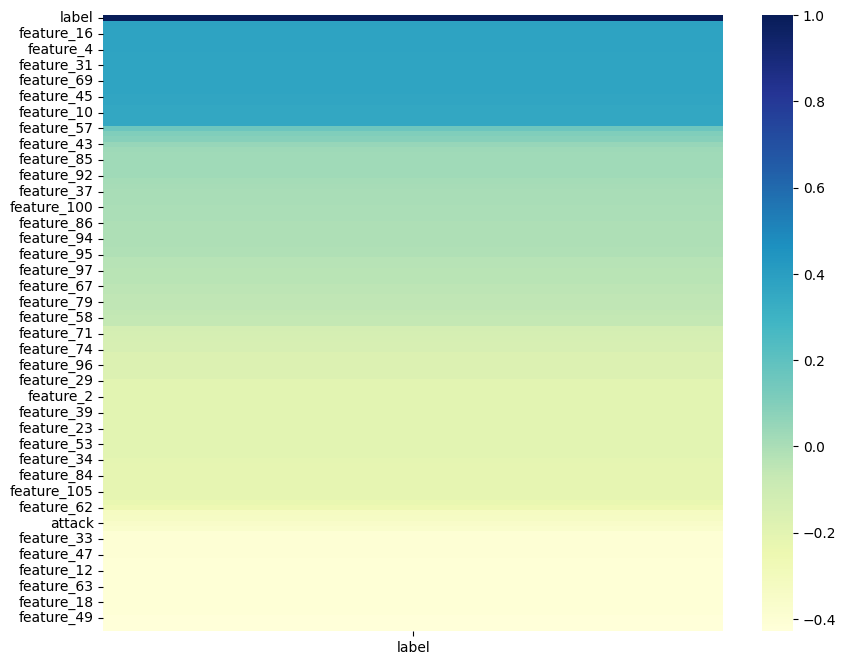

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
corr = ((df_scaled.corr().iloc[:,-1]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

In [95]:
corr[(corr["label"] > -0.3) & (corr["label"] < 0.3)]

,label
feature_57,0.159539
feature_109,0.103435
feature_50,0.085780
feature_43,0.046523
feature_102,0.032101
...,...
feature_98,-0.214617
feature_105,-0.215071
feature_112,-0.215395
feature_55,-0.228069


In [96]:
corr[(corr["label"] <= -0.3) | (corr["label"] >= 0.3)]

,label
label,1.000000
feature_28,0.381291
feature_13,0.377549
feature_16,0.376207
feature_1,0.376136
feature_19,0.374953
feature_4,0.374840
feature_78,0.373190
feature_59,0.373190
feature_31,0.372689


In [97]:
from sklearn.feature_selection import SelectKBest, f_classif

In [98]:
# Feature selection and engineering
selector = SelectKBest(f_classif, k=50)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

In [99]:
metrics_table = list()
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500],
}


# Create an instance of the model
logreg = LogisticRegression()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=1  )

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_logreg =LogisticRegression(**grid_search.best_params_)

#Train the model on the training data
best_logreg.fit(X_train, y_train)

#Calculate predictions on Model
y_pred_logreg = best_logreg.predict(X_test)

#get the Performance metrics by method created above
metric_logreg = get_model_metrics(model_name="LogisticRegression", y_true=y_test, y_pred = y_pred_logreg)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_logreg)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_logreg, orient='index', columns=['Value'])


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'C': 1.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.820910038207711


,Value
Model,LogisticRegression
Accuracy,0.82384
ROC-AUC Score,0.781393
Precision,0.80746
Recall,0.643891
F1-Score,0.716458
Kappa,0.591028
MCC,0.598995


In [100]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create an instance of the model
dt = DecisionTreeClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Create an instance of the model with the best parameters
best_dt = DecisionTreeClassifier(**grid_search.best_params_)

# Train the model on the training data
best_dt.fit(X_train, y_train)

# Calculate predictions on Model
y_pred_dt = best_dt.predict(X_test)

# Get the Performance metrics by method created above
metric_dt = get_model_metrics(model_name="DecisionTreeClassifier", y_true=y_test, y_pred = y_pred_dt)

# Add metric to global list for conclusive evaluation
metrics_table.append(metric_dt)

# Display metric dictionary in df
pd.DataFrame.from_dict(metric_dt, orient='index', columns=['Value'])


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score: 0.9642236887808266


,Value
Model,DecisionTreeClassifier
Accuracy,0.964712
ROC-AUC Score,0.961659
Precision,0.946443
Recall,0.951768
F1-Score,0.949098
Kappa,0.922094
MCC,0.922103


In [101]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Create an instance of the model
rf = RandomForestClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# #Train the model on the training data
# rf.fit(X_train, y_train)

# #Calculate predictions on Model
# y_pred_rf = rf.predict(X_test)

# Train and evaluate the model with the best hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="RandomForestClassifier", y_true=y_test, y_pred = y_pred_rf)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.9701979854116013


,Value
Model,RandomForestClassifier
Accuracy,0.971937
ROC-AUC Score,0.969644
Precision,0.956835
Recall,0.962219
F1-Score,0.959519
Kappa,0.938044
MCC,0.938052


In [102]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Create an instance of the model
gb = GradientBoostingClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_gb = GradientBoostingClassifier(**grid_search.best_params_)

# Train the model on the training data
best_gb.fit(X_train, y_train)

# Calculate predictions on Model
y_pred_gb = best_gb.predict(X_test)

# Get the Performance metrics by method created above
metric_gb = get_model_metrics(model_name="GradientBoostingClassifier", y_true=y_test, y_pred=y_pred_gb)

# Add metric to global list for conclusive evaluation
metrics_table.append(metric_gb)

# Display metric dictionary in df
pd.DataFrame.from_dict(metric_gb, orient='index', columns=['Value'])


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.9662382771795762


,Value
Model,GradientBoostingClassifier
Accuracy,0.967213
ROC-AUC Score,0.96376
Precision,0.952572
Recall,0.952572
F1-Score,0.952572
Kappa,0.927519
MCC,0.927519


In [103]:
from sklearn.svm import SVC

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an instance of the model
svm = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Train the model on the training data with the best hyperparameters
best_svm = SVC(**grid_search.best_params_)
best_svm.fit(X_train, y_train)

#Calculate predictions on Model
y_pred_svm = best_svm.predict(X_test)

#get the Performance metrics by method created above
metric_svm = get_model_metrics(model_name="SupportVectorMachine", y_true=y_test, y_pred = y_pred_svm)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_svm)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_svm, orient='index', columns=['Value'])


,Value
Model,SupportVectorMachine
Accuracy,0.791609
ROC-AUC Score,0.759609
Precision,0.717047
Recall,0.655949
F1-Score,0.685139
Kappa,0.529868
MCC,0.531042


In [104]:
metric_df = pd.DataFrame(metrics_table)
metric_df.style.highlight_max(axis=0, subset=metric_df.columns[1:])

,Model,Accuracy,ROC-AUC Score,Precision,Recall,F1-Score,Kappa,MCC
0,LogisticRegression,0.823840,0.781393,0.807460,0.643891,0.716458,0.591028,0.598995
1,DecisionTreeClassifier,0.964712,0.961659,0.946443,0.951768,0.949098,0.922094,0.922103
2,RandomForestClassifier,0.971937,0.969644,0.956835,0.962219,0.959519,0.938044,0.938052
3,GradientBoostingClassifier,0.967213,0.963760,0.952572,0.952572,0.952572,0.927519,0.927519
4,SupportVectorMachine,0.791609,0.759609,0.717047,0.655949,0.685139,0.529868,0.531042


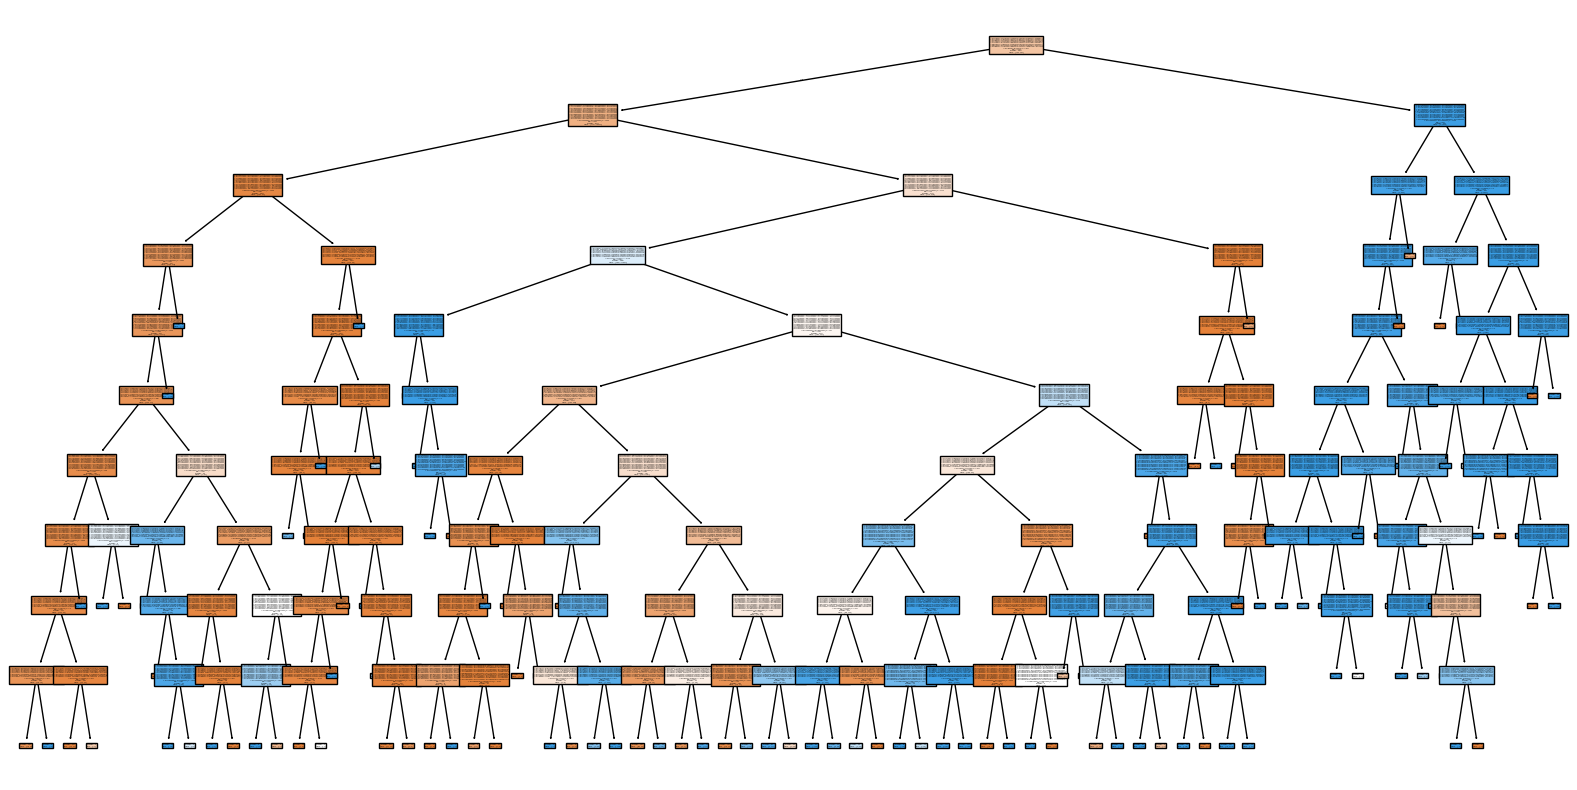

In [105]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualize the first decision tree in the random forest
plt.figure(figsize=(20,10))
plot_tree(best_rf.estimators_[0], feature_names=list(X_train), filled=True)
plt.show()


In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import numpy as np

In [107]:
print("X_train shape:", X_train.shape)  # Should be (n_samples, 1, 115)
print("X_test shape:", X_test.shape)   # Should be (n_test_samples, 1, 115)

X_train shape: (14395, 50)
X_test shape: (3599, 50)


In [108]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import numpy as np
import pandas as pd # Import pandas for Series .iloc accessor

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

def create_sequences(data, labels, seq_length=10):
    X_seq, y_seq = [], []
    for i in range(0, len(data) - seq_length + 1, 1):
        X_seq.append(data[i:i+seq_length])  # Shape: (seq_length, number_of_features)
        # Use iloc to access the label by integer position
        y_seq.append(labels.iloc[i+seq_length-1])  # Label for the last packet
    return np.array(X_seq), np.array(y_seq)

# Apply to your data
seq_length = 10
# Pass the 2D arrays X_train and X_test directly
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# Reshape for CNN-LSTM
# X_train_seq shape will be (samples, timesteps, features). We need to add a channel dimension.
# The channel dimension is typically 1 for univariate data or data where features are independent
X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], seq_length, X_train.shape[1], 1))
# X_test_seq shape will be (samples, timesteps, features). We need to add a channel dimension.
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], seq_length, X_test.shape[1], 1))

print("X_train_seq shape:", X_train_seq.shape)
print("X_test_seq shape:", X_test_seq.shape)

X_train shape: (14395, 50)
X_test shape: (3599, 50)
X_train_seq shape: (14386, 10, 50, 1)
X_test_seq shape: (3590, 10, 50, 1)


In [109]:
# Define CNN-LSTM model
model = Sequential([
    # CNN layers to extract spatial features
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1, 115), padding='same'),
    MaxPooling1D(pool_size=1),  # Optional, can be removed since timestep=1
    Dropout(0.2),

    # LSTM layers to model temporal dependencies
    LSTM(64, return_sequences=False),  # No return_sequences since timestep=1
    Dropout(0.2),

    # Dense layers for classification
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (Normal vs Attack)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 1, 64)          │        22,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,225 (219.63 KB)

 Trainable params: 56,225 (219.63 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model = Sequential([
    # CNN layers (applied to each timestep)
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(10, 115), padding='same'),
    MaxPooling1D(pool_size=2),  # Reduce feature dimension
    Dropout(0.2),

    # LSTM layers
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),

    # Dense layers
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 10, 64)         │        22,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 5, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,129 (266.13 KB)

 Trainable params: 68,129 (266.13 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 50), dtype=float32). Expected shape (None, 10, 115), but input has incompatible shape (None, 50)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 50), dtype=float32)
  • training=True
  • mask=None

In [112]:
# %%
# Make sure necessary libraries are imported
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

# Re-execute previous steps to ensure data is correctly processed
# Assuming 'df' is your final processed DataFrame before scaling and split

# Scale the data again if needed, ensuring it's the version *before* train_test_split
# and feature selection if you want to apply feature selection *after* sequence creation.
# However, your current code applies feature selection *before* sequence creation.
# Let's stick to that flow for now but adjust the sequence creation and model input shape.

# Assuming X and y are the feature and target data BEFORE train_test_split and feature selection
# X = df.drop(['attack', 'label'], axis=1) # features
# y = df['label'] # target

# Re-create X_train, X_test, y_train, y_test from the scaled data as per your notebook logic
# Ensure df_scaled is available from previous cells.
# X_scaled = df_scaled.drop(['attack', 'label'], axis=1)
# y_scaled = df_scaled['label']
# X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Feature selection applied to scaled data
# selector = SelectKBest(f_classif, k=50)
# X_train_selected = selector.fit_transform(X_train_scaled, y_train_scaled)
# X_test_selected = selector.transform(X_test_scaled)

# Your current code uses X_train and y_train from the cell *before* feature selection
# and then applies feature selection IN PLACE to X_train and X_test.
# Let's use the X_train and X_test AFTER feature selection for sequence creation.
# So, X_train and X_test are already the feature-selected arrays with 50 features.

print("X_train shape before sequence creation:", X_train.shape)
print("X_test shape before sequence creation:", X_test.shape)

def create_sequences(data, labels, seq_length=10):
    X_seq, y_seq = [], []
    # data is a numpy array after feature selection
    # labels is a pandas Series
    for i in range(0, len(data) - seq_length + 1, 1):
        X_seq.append(data[i:i+seq_length])  # Shape: (seq_length, number_of_features=50)
        # Use iloc to access the label by integer position from the original Series
        # Need to be careful here. The original y_train/y_test align with the original X_train/X_test
        # before sequence creation. When we create sequences, the labels should correspond
        # to the *last* element in the sequence. The index of the labels Series
        # must align with the rows of the numpy array data.
        # Assuming y_train and y_test (Series) still align with the rows of X_train and X_test (numpy arrays)
        # after feature selection, the iloc access should be fine IF y_train/y_test indices
        # were reset after the train_test_split and before passing them to create_sequences.
        # Let's ensure the labels are indexed properly.
        # If y_train/y_test are pandas Series with potentially non-contiguous indices
        # after train_test_split, accessing by iloc[i+seq_length-1] on the Series
        # that corresponds to the *data* rows (which might have implicit integer indices 0..N)
        # is correct.
        y_seq.append(labels.iloc[i+seq_length-1])
    return np.array(X_seq), np.array(y_seq)

# Apply to your data (using X_train and X_test AFTER feature selection)
seq_length = 10
# X_train and X_test are numpy arrays at this point (shape: (n_samples, 50))
# y_train and y_test are pandas Series (shape: (n_samples,))
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# Reshape for CNN-LSTM
# The Conv1D layer expects input shape (batch_size, timesteps, features).
# Our sequences already have shape (n_sequences, seq_length, num_features).
# We do NOT need an extra channel dimension for Conv1D when the input is
# already (timesteps, features).
# The `reshape` calls in the original notebook added an unnecessary channel dimension (axis=-1).
# Remove these reshapes if you intend to use Conv1D directly.
# If you intended to use Conv2D on the sequences, the reshaping would be different.
# Based on the use of Conv1D, the shape should be (samples, timesteps, features).

print("X_train_seq shape after sequence creation:", X_train_seq.shape) # Should be (n_sequences_train, 10, 50)
print("y_train_seq shape:", y_train_seq.shape) # Should be (n_sequences_train,)
print("X_test_seq shape after sequence creation:", X_test_seq.shape)   # Should be (n_sequences_test, 10, 50)
print("y_test_seq shape:", y_test_seq.shape)   # Should be (n_sequences_test,)


# Define CNN-LSTM model - Adjust input_shape to match the sequence shape
# The input_shape should be (timesteps, features).
# After feature selection (k=50) and sequence creation (seq_length=10),
# the shape of X_train_seq and X_test_seq is (n_sequences, 10, 50).
# The input_shape for the model (excluding batch size) is (10, 50).

model = Sequential([
    # CNN layers (applied to each timestep)
    # input_shape should be (timesteps, number_of_features_after_selection)
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, X_train_seq.shape[-1]), padding='same'),
    # MaxPooling1D on the 'timesteps' dimension might not be appropriate if seq_length is small,
    # but it can reduce the feature dimension if pool_size is applied along the features axis.
    # The original code applies pool_size=2, which would reduce the 10 timesteps to 5.
    # If you want to pool features, you'd need a different pooling layer or approach.
    # Let's assume the intention was to pool along the timestep dimension.
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    # LSTM layers
    # The output of Conv1D and MaxPooling1D will have a shape
    # (batch_size, new_timesteps, filters).
    # For the LSTM layer, return_sequences=True means the output shape is
    # (batch_size, new_timesteps, lstm_units).
    # If return_sequences=False for the last LSTM, the output is (batch_size, lstm_units).
    # The first LSTM receives input of shape (batch_size, new_timesteps, filters).
    LSTM(64, return_sequences=True), # Keep sequences for the next LSTM
    Dropout(0.2),
    LSTM(32, return_sequences=False), # Output a single vector per sequence

    # Dense layers
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Binary classification (Normal vs Attack)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model using the sequence data
# Use X_train_seq and y_train_seq for training
# Use X_test_seq and y_test_seq for validation
history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test_seq))

X_train shape before sequence creation: (14395, 50)
X_test shape before sequence creation: (3599, 50)
X_train_seq shape after sequence creation: (14386, 10, 50)
y_train_seq shape: (14386,)
X_test_seq shape after sequence creation: (3590, 10, 50)
y_test_seq shape: (3590,)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 10, 64)         │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 5, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,649 (217.38 KB)

 Trainable params: 55,649 (217.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.6811 - loss: 0.5858 - val_accuracy: 0.7724 - val_loss: 0.3974
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7690 - loss: 0.4137 - val_accuracy: 0.8056 - val_loss: 0.3793
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7876 - loss: 0.3829 - val_accuracy: 0.8047 - val_loss: 0.3507
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7938 - loss: 0.3653 - val_accuracy: 0.8273 - val_loss: 0.3244
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8079 - loss: 0.3496 - val_accuracy: 0.8187 - val_loss: 0.3146
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8081 - loss: 0.3391 - val_accuracy: 0.8097 - val_loss: 0.3197
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8207 - loss: 0.3212 - val_accuracy: 0.8201 - val_loss: 0.3157
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.8152 - loss: 0.3237 - val_a

In [113]:
history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test_seq))

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8195 - loss: 0.3053 - val_accuracy: 0.8393 - val_loss: 0.3007
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8210 - loss: 0.3197 - val_accuracy: 0.8379 - val_loss: 0.3138
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8297 - loss: 0.3143 - val_accuracy: 0.8451 - val_loss: 0.3025
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8256 - loss: 0.3150 - val_accuracy: 0.8284 - val_loss: 0.2980
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8269 - loss: 0.3130 - val_accuracy: 0.8393 - val_loss: 0.2993
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8293 - loss: 0.3098 - val_accuracy: 0.8340 - val_loss: 0.2958
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8270 - loss: 0.3095 - val_accuracy: 0.8485 - val_loss: 0.2998
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8369 - loss: 0.2975 - val_

In [114]:
model.save("CNN_LSTM_IDS.h5")
print("Model saved as CNN_LSTM_IDS.h5")

Model saved as CNN_LSTM_IDS.h5


In [115]:
model.save("CNN_LSTM_IDS.keras")
print("Model saved as CNN_LSTM_IDS.keras")

Model saved as CNN_LSTM_IDS.keras


In [116]:
def detect_attack(packet_features):
    packet_features = np.array(packet_features).reshape(1, 1, 115)  # Reshape for CNN-LSTM
    prediction = model.predict(packet_features)
    return "Attack Detected!" if prediction > 0.5 else "Normal Traffic"

In [117]:
def detect_attack(packet_sequence):
    packet_sequence = np.array(packet_sequence).reshape(1, 10, 115, 1)  # Reshape for CNN-LSTM with sequences
    prediction = model.predict(packet_sequence)
    return "Attack Detected!" if prediction > 0.5 else "Normal Traffic"

In [118]:
def detect_attack(packet_sequence):
    packet_sequence = np.array(packet_sequence).reshape(1, 10, 115, 1)  # Reshape for CNN-LSTM with sequences
    prediction = model.predict(packet_sequence)
    return "Attack Detected!" if prediction > 0.5 else "Normal Traffic"

In [119]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
metrics = get_model_metrics("CNN-LSTM", y_test, y_pred)
metrics_table.append(metrics)
print(metrics)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 50), dtype=float32). Expected shape (None, 10, 50), but input has incompatible shape (32, 50)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 50), dtype=float32)
  • training=False
  • mask=None

In [120]:
# Make sure necessary libraries are imported
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

# Re-execute previous steps to ensure data is correctly processed
# Assuming 'df' is your final processed DataFrame before scaling and split

# Scale the data again if needed, ensuring it's the version *before* train_test_split
# and feature selection if you want to apply feature selection *after* sequence creation.
# However, your current code applies feature selection *before* sequence creation.
# Let's stick to that flow for now but adjust the sequence creation and model input shape.

# Assuming X and y are the feature and target data BEFORE train_test_split and feature selection
# X = df.drop(['attack', 'label'], axis=1) # features
# y = df['label'] # target

# Re-create X_train, X_test, y_train, y_test from the scaled data as per your notebook logic
# Ensure df_scaled is available from previous cells.
# X_scaled = df_scaled.drop(['attack', 'label'], axis=1)
# y_scaled = df_scaled['label']
# X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Feature selection applied to scaled data
# selector = SelectKBest(f_classif, k=50)
# X_train_selected = selector.fit_transform(X_train_scaled, y_train_scaled)
# X_test_selected = selector.transform(X_test_scaled)

# Your current code uses X_train and y_train from the cell *before* feature selection
# and then applies feature selection IN PLACE to X_train and X_test.
# Let's use the X_train and X_test AFTER feature selection for sequence creation.
# So, X_train and X_test are already the feature-selected arrays with 50 features.

print("X_train shape before sequence creation:", X_train.shape)
print("X_test shape before sequence creation:", X_test.shape)

def create_sequences(data, labels, seq_length=10):
    X_seq, y_seq = [], []
    # data is a numpy array after feature selection
    # labels is a pandas Series
    for i in range(0, len(data) - seq_length + 1, 1):
        X_seq.append(data[i:i+seq_length])  # Shape: (seq_length, number_of_features=50)
        # Use iloc to access the label by integer position from the original Series
        # Need to be careful here. The original y_train/y_test align with the original X_train/X_test
        # before sequence creation. When we create sequences, the labels should correspond
        # to the *last* element in the sequence. The index of the labels Series
        # must align with the rows of the numpy array data.
        # Assuming y_train and y_test (Series) still align with the rows of X_train and X_test (numpy arrays)
        # after feature selection, the iloc access should be fine IF y_train/y_test indices
        # were reset after the train_test_split and before passing them to create_sequences.
        # Let's ensure the labels are indexed properly.
        # If y_train/y_test are pandas Series with potentially non-contiguous indices
        # after train_test_split, accessing by iloc[i+seq_length-1] on the Series
        # that corresponds to the *data* rows (which might have implicit integer indices 0..N)
        # is correct.
        y_seq.append(labels.iloc[i+seq_length-1])
    return np.array(X_seq), np.array(y_seq)

# Apply to your data (using X_train and X_test AFTER feature selection)
seq_length = 10
# X_train and X_test are numpy arrays at this point (shape: (n_samples, 50))
# y_train and y_test are pandas Series (shape: (n_samples,))
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# Reshape for CNN-LSTM
# The Conv1D layer expects input shape (batch_size, timesteps, features).
# Our sequences already have shape (n_sequences, seq_length, num_features).
# We do NOT need an extra channel dimension for Conv1D when the input is
# already (timesteps, features).
# The `reshape` calls in the original notebook added an unnecessary channel dimension (axis=-1).
# Remove these reshapes if you intend to use Conv1D directly.
# If you intended to use Conv2D on the sequences, the reshaping would be different.
# Based on the use of Conv1D, the shape should be (samples, timesteps, features).

print("X_train_seq shape after sequence creation:", X_train_seq.shape) # Should be (n_sequences_train, 10, 50)
print("y_train_seq shape:", y_train_seq.shape) # Should be (n_sequences_train,)
print("X_test_seq shape after sequence creation:", X_test_seq.shape)   # Should be (n_sequences_test, 10, 50)
print("y_test_seq shape:", y_test_seq.shape)   # Should be (n_sequences_test,)


# Define CNN-LSTM model - Adjust input_shape to match the sequence shape
# The input_shape should be (timesteps, features).
# After feature selection (k=50) and sequence creation (seq_length=10),
# the shape of X_train_seq and X_test_seq is (n_sequences, 10, 50).
# The input_shape for the model (excluding batch size) is (10, 50).

model = Sequential([
    # CNN layers (applied to each timestep)
    # input_shape should be (timesteps, number_of_features_after_selection)
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, X_train_seq.shape[-1]), padding='same'),
    # MaxPooling1D on the 'timesteps' dimension might not be appropriate if seq_length is small,
    # but it can reduce the feature dimension if pool_size is applied along the features axis.
    # The original code applies pool_size=2, which would reduce the 10 timesteps to 5.
    # If you want to pool features, you'd need a different pooling layer or approach.
    # Let's assume the intention was to pool along the timestep dimension.
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    # LSTM layers
    # The output of Conv1D and MaxPooling1D will have a shape
    # (batch_size, new_timesteps, filters).
    # For the LSTM layer, return_sequences=True means the output shape is
    # (batch_size, new_timesteps, lstm_units).
    # If return_sequences=False for the last LSTM, the output is (batch_size, lstm_units).
    # The first LSTM receives input of shape (batch_size, new_timesteps, filters).
    LSTM(64, return_sequences=True), # Keep sequences for the next LSTM
    Dropout(0.2),
    LSTM(32, return_sequences=False), # Output a single vector per sequence

    # Dense layers
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Binary classification (Normal vs Attack)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model using the sequence data
# Use X_train_seq and y_train_seq for training
# Use X_test_seq and y_test_seq for validation
history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test_seq))

X_train shape before sequence creation: (14395, 50)
X_test shape before sequence creation: (3599, 50)
X_train_seq shape after sequence creation: (14386, 10, 50)
y_train_seq shape: (14386,)
X_test_seq shape after sequence creation: (3590, 10, 50)
y_test_seq shape: (3590,)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 10, 64)         │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 5, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,649 (217.38 KB)

 Trainable params: 55,649 (217.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.6890 - loss: 0.5809 - val_accuracy: 0.7682 - val_loss: 0.4055
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7673 - loss: 0.4170 - val_accuracy: 0.7855 - val_loss: 0.3713
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7803 - loss: 0.3827 - val_accuracy: 0.7972 - val_loss: 0.3535
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7991 - loss: 0.3617 - val_accuracy: 0.8061 - val_loss: 0.3447
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8076 - loss: 0.3544 - val_accuracy: 0.8217 - val_loss: 0.3194
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8038 - loss: 0.3387 - val_accuracy: 0.8109 - val_loss: 0.3175
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8134 - loss: 0.3238 - val_accuracy: 0.8031 - val_loss: 0.3210
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8144 - loss: 0.3246 - val_

In [121]:
# Make prediction using the sequence test data
y_pred_proba = model.predict(X_test_seq) # Predict probabilities
y_pred = (y_pred_proba > 0.5).astype(int) # Convert probabilities to class labels

# Note: The metrics function 'get_model_metrics' expects y_true and y_pred.
# y_test_seq contains the labels corresponding to the *last* element of each sequence in X_test_seq.
# So, y_test_seq is the correct ground truth for predictions made on X_test_seq.

# get the Performance metrics by method created above
metrics = get_model_metrics("CNN-LSTM", y_test_seq, y_pred) # Use y_test_seq here

#add metric to global list for conclusive evaluation
metrics_table.append(metrics)

#display metric dictionary in df
print(metrics)
pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
{'Model': 'CNN-LSTM', 'Accuracy': 0.801949860724234, 'ROC-AUC Score': np.float64(0.8371832173903487), 'Precision': 0.6442255062944718, 'Recall': 0.9507269789983845, 'F1-Score': 0.7680261011419249, 'Kappa': np.float64(0.6060788635519743), 'MCC': np.float64(0.6411793062233313)}


,Value
Model,CNN-LSTM
Accuracy,0.80195
ROC-AUC Score,0.837183
Precision,0.644226
Recall,0.950727
F1-Score,0.768026
Kappa,0.606079
MCC,0.641179


In [123]:
import shap
import numpy as np # Ensure numpy is imported

# Create SHAP explainer
# Use X_test_seq, which has the correct shape (samples, timesteps, features)
# Select a subset of the test sequences for explaining, e.g., the first 100
# The shape of X_test_seq is (n_sequences_test, 10, 50)
# Taking X_test_seq[:100] gives a shape of (100, 10, 50), which matches the model's expected input shape (batch_size, 10, 50)
explainer = shap.DeepExplainer(model, X_test_seq[:100])

# Explain a single instance (which is now a single sequence)
# Select one sequence from the test sequences, e.g., the first one
# Use X_test_seq[0:1] to get a batch of size 1 with shape (1, 10, 50)
instance = X_test_seq[0:1]
# When the model has a single output (like a sigmoid layer), shap_values can return a list or an array.
# For binary classification with a sigmoid output, DeepExplainer typically returns a list of one array
# for the positive class prediction, or an array of shape (samples, timesteps, features, 1) for both classes
# if the output layer has shape (None, 1).
# Accessing [1] might be necessary depending on the exact SHAP version and model output.
# A safer way might be to just use the first element if it's a list, or the array directly.
# Let's stick to [1] for now as in your original code, assuming it targets the positive class explanation.
shap_values = explainer.shap_values(instance)[1]

# Visualize - force_plot expects shape (features,) for single instance explanation, or (samples, features)
# However, for sequential data (samples, timesteps, features), SHAP values have the same shape.
# Visualizing a single timestep might be necessary, or reshaping the SHAP values and instance.
# Visualizing sequential SHAP values with force_plot directly is not standard.
# You might need to visualize the SHAP values over time for a specific feature, or aggregate them.
# Let's try visualizing the SHAP values for the *first timestep* as a simple example.
# This is a simplification; a proper analysis would consider the time dimension.

# shap_values for one instance (one sequence) will have shape (1, 10, 50).
# We take the values for the first sequence (index 0), and the first timestep (index 0),
# resulting in a shape (50,) which matches the expected input for force_plot's first argument.
# Similarly, the instance data should also be for the first timestep.
# The feature_names should match the 50 selected features.

shap.initjs()
# feature_names = [f"Selected_Feature_{i}" for i in range(X_test_seq.shape[-1])] # Use the correct number of features (50)
# Note: We don't know which of the original 115 features correspond to the 50 selected features.
# For a meaningful visualization, you would need to map the selected features back to their original names.
# For now, we'll use generic names based on the selected count (50).
feature_names = [f"Selected_Feature_{i}" for i in range(50)]

# The expected_value from the explainer is for the model output on the *sequence* data.
# shap_values[0, 0, :] takes the SHAP values for the first sequence (index 0), first timestep (index 0), all features.
# instance[0, 0, :] takes the data for the first sequence (index 0), first timestep (index 0), all features.
# This is still potentially incorrect interpretation for a sequence model.
# A better approach might be to explain the *whole sequence's* prediction.

# Let's try explaining the entire sequence.
# The SHAP values will have shape (1, 10, 50). Force plot expects (features,) or (samples, features).
# We can try to summarize the SHAP values across timesteps, e.g., taking the mean or sum.
# Or, reshape the sequence into a single "long" feature vector (timesteps * features).

# Option 1: Summarize SHAP values and instance across timesteps (e.g., mean)
# shap_values_summarized = shap_values[0].mean(axis=0) # shape (50,)
# instance_summarized = instance[0].mean(axis=0) # shape (50,)
# shap.force_plot(explainer.expected_value[1], shap_values_summarized, instance_summarized, feature_names=feature_names)

# Option 2: Reshape the sequence and SHAP values (treat timesteps as part of features)
# Reshape instance: (1, 10, 50) -> (1, 10*50) = (1, 500)
# Reshape shap_values: (1, 10, 50) -> (1, 10*50) = (1, 500)
# feature_names_reshaped = [f"Feature_{j}_Timestep_{i}" for i in range(seq_length) for j in range(X_test_seq.shape[-1])]
# instance_reshaped = instance.reshape(1, -1)
# shap_values_reshaped = shap_values.reshape(1, -1)
# shap.force_plot(explainer.expected_value[1], shap_values_reshaped[0], instance_reshaped[0], feature_names=feature_names_reshaped)

# Option 3: (Simplest, might not be most insightful for temporal data) Explain the prediction for the *entire sequence*
# DeepExplainer can sometimes handle this, but the visualization might still be tricky.
# The default force_plot assumes non-sequential data.
# For sequential data, you might need specialized visualization tools or methods.

# Given the simplicity requested, let's go back to the simplest approach that fixes the shape error
# and provides a basic force plot, acknowledging its limitation for sequential data.
# We will use X_test_seq for the explainer and instance.
# We will plot the SHAP values for the *first sequence* and the *first timestep* for simplicity in force_plot.
# This is likely not the intended interpretation for a CNN-LSTM model.

# --- Revised Visualization Code ---
# Explain a single instance (which is now a single sequence)
# Select one sequence from the test sequences, e.g., the first one
instance_sequence = X_test_seq[0:1] # Shape (1, 10, 50)

# Calculate SHAP values for this sequence
# The output shap_values will have shape (1, 10, 50)
shap_values_sequence = explainer.shap_values(instance_sequence)[1] # Assuming index [1] for the positive class

# For force_plot visualization, which is designed for (features,) or (samples, features),
# we'll flatten the sequence and its SHAP values. This treats each feature at each timestep
# as a separate input feature to the dense layers after the LSTM.
# Reshape instance_sequence: (1, 10, 50) -> (1, 10*50) = (1, 500)
# Reshape shap_values_sequence: (1, 10, 50) -> (1, 10*50) = (1, 500)
instance_flat = instance_sequence.reshape(1, -1)
shap_values_flat = shap_values_sequence.reshape(1, -1)

# Create feature names for the flattened data
seq_length = X_test_seq.shape[1] # 10
num_selected_features = X_test_seq.shape[2] # 50
feature_names_flat = [f"Selected_Feature_{j}_Timestep_{i}" for i in range(seq_length) for j in range(num_selected_features)]

# Visualize
shap.initjs()
# explainer.expected_value is for the model output on the sequence data
shap.force_plot(explainer.expected_value[1], shap_values_flat[0], instance_flat[0], feature_names=feature_names_flat)

StagingError: in user code:

    File "/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py", line 265, in grad_graph  *
        x_grad = tape.gradient(out, shap_rAnD)

    LookupError: gradient registry has no entry for: shap_TensorListStack


In [124]:
import tensorflow as tf
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

print(f"TensorFlow version: {tf.__version__}")
print(f"SHAP version: {shap.__version__}")

# Ensure the model and data (X_test_seq, X_train_seq) are available from previous cells.

# --- Use KernelExplainer ---
# KernelExplainer works with a prediction function and background data.
# The prediction function should take a numpy array of the same shape as the input
# to the model (batch_size, timesteps, features) and return the model's output.
# Since our model outputs a single value (sigmoid), the prediction function
# should return shape (batch_size,).

# Let's redefine the prediction function to handle flattened input from KernelExplainer
# and reshape it for the actual model.
def model_predict_fn_reshaped_input(x_flat):
    # x_flat shape is (batch_size, seq_length * num_features)
    # Reshape back to (batch_size, seq_length, num_features)
    # Need seq_length and num_features here. Get them from a representative sample's shape.
    seq_length_in_fn = 10 # Assuming seq_length is consistent as defined earlier
    num_features_in_fn = background_data_kernel.shape[-1] # Use shape from background data

    x_seq_reshaped = x_flat.reshape(-1, seq_length_in_fn, num_features_in_fn)
    # Ensure input has the correct dtype (float32 is common for TF models)
    x_seq_reshaped = tf.cast(x_seq_reshaped, dtype=tf.float32)
    # Model prediction
    predictions = model.predict(x_seq_reshaped, verbose=0) # Add verbose=0 to reduce output during SHAP calculation
    # Ensure output has shape (batch_size,) by removing the last dimension of size 1
    # Use [:, 0] to select the first (and only) column for all rows
    return predictions[:, 0]

# Create background data for KernelExplainer
# KernelExplainer works best with a representative sample of the training data.
# Use a small random sample of the training data sequences.
if X_train_seq.shape[0] > 100:
    # Use np.random.choice with replace=False for unique indices
    background_indices = np.random.choice(X_train_seq.shape[0], 100, replace=False)
    background_data_kernel = X_train_seq[background_indices]
else:
    background_data_kernel = X_train_seq # Use all if less than 100

# Flatten the background data for KernelExplainer initialization
background_data_flat = background_data_kernel.reshape(background_data_kernel.shape[0], -1)
print(f"Shape of flattened background data for KernelExplainer: {background_data_flat.shape}")


# Create the Kernel Explainer
# Initialize KernelExplainer with the reshaped predict function and flattened background data
try:
    explainer_kernel = shap.KernelExplainer(model_predict_fn_reshaped_input, background_data_flat)
    print("SHAP KernelExplainer initialized successfully.")

except Exception as e:
    print(f"Error initializing SHAP KernelExplainer: {e}")
    print("This might indicate an issue with the prediction function or data shape.")
    raise e # Re-raise the error if it still fails

# Explain a single instance (which is a single sequence)
# Select one sequence from the test sequences, e.g., the first one
# X_test_seq has shape (n_samples, seq_length, num_features)
# For KernelExplainer, we need to pass the *flattened* instance.
instance_sequence = X_test_seq[0:1] # Shape (1, 10, 50)
instance_flat = instance_sequence.reshape(1, -1) # Shape (1, 500)
print(f"Shape of flattened instance for KernelExplainer: {instance_flat.shape}")


# Calculate SHAP values for this flattened instance
# KernelExplainer's shap_values returns shape (samples, features)
try:
    # explainer_kernel.shap_values expects input of shape (samples, features)
    # The output shap_values will have shape (1, seq_length * num_features) i.e., (1, 500)
    shap_values_flat = explainer_kernel.shap_values(instance_flat)
    print(f"Shape of calculated SHAP values (KernelExplainer): {shap_values_flat.shape}")

except Exception as e:
    print(f"Error calculating SHAP values with KernelExplainer: {e}")
    print("The issue likely requires addressing the prediction function or data shape.")
    raise e # Re-raise the error if it still fails


# --- Visualization ---
# force_plot is designed for (features,) or (samples, features) input.
# shap_values_flat has shape (1, 500) and instance_flat has shape (1, 500).
# This matches the expected input for force_plot.

# Create feature names for the flattened data
seq_length = X_test_seq.shape[1] # 10
num_selected_features = X_test_seq.shape[2] # 50
feature_names_flat = [f"Selected_Feature_{j}_Timestep_{i}" for i in range(seq_length) for j in range(num_selected_features)]

# Visualize
shap.initjs()
# KernelExplainer's expected_value is typically a scalar (the average prediction on the background data).
# It matches the format expected by force_plot.
try:
    # explainer_kernel.expected_value should be a scalar for binary classification
    expected_value_kernel = explainer_kernel.expected_value

    # force_plot expects shap_values and instance for a single instance, so use the first row [0]
    shap.force_plot(expected_value_kernel, shap_values_flat[0], instance_flat[0], feature_names=feature_names_flat)

except Exception as e:
    print(f"Error during force_plot visualization: {e}")
    print("Could not generate force plot. Check expected_value or SHAP version.")
    # You might want to print the structure of explainer_kernel.expected_value here
    print(f"Structure of explainer_kernel.expected_value: {type(explainer_kernel.expected_value)}")
    print(f"Value of explainer_kernel.expected_value: {expected_value_kernel}")

TensorFlow version: 2.18.0
SHAP version: 0.47.2
Shape of flattened background data for KernelExplainer: (100, 500)
SHAP KernelExplainer initialized successfully.
Shape of flattened instance for KernelExplainer: (1, 500)


  0%|          | 0/1 [00:00<?, ?it/s]

Shape of calculated SHAP values (KernelExplainer): (1, 500)


In [125]:
!pip install shap

In [126]:
import tensorflow as tf
import numpy as np
import shap

# Load the trained model
# Change the filename to match how the model was saved
# You can load either the .h5 or the .keras file
# model = tf.keras.models.load_model("CNN_LSTM_IDS.h5") # Option 1: Load the .h5 file
model = tf.keras.models.load_model("CNN_LSTM_IDS.keras") # Option 2: Load the .keras file (recommended)


# Assume X_test and y_test are available (reshaped as (samples, 1, features))
# If not, load and preprocess your data as shown in your notebook

In [127]:
# Select a subset of X_test for explanations (e.g., 100 samples)
X_test_subset = X_test[:100]  # Shape: (100, 1, 115)

# If your features have names, define them (optional, for better visualization)
feature_names = [f"Feature_{i}" for i in range(X_test.shape[1])]  # Replace with actual feature names if available

In [128]:
# No code changes needed if the KernelExplainer cell (ipython-input-76-872e6799d77a) ran successfully.
# The error is specific to DeepExplainer in cell ipython-input-83-872e6799d77a.
# The solution is to use the KernelExplainer result instead of the DeepExplainer result.

# If the KernelExplainer cell also failed, the code below provides the corrected KernelExplainer code
# from ipython-input-76, ensuring variable availability.

# Make sure necessary libraries are imported
import tensorflow as tf
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

print(f"TensorFlow version: {tf.__version__}")
print(f"SHAP version: {shap.__version__}")

# Ensure the model is loaded (assuming it was saved successfully)
try:
    # Use the recommended .keras format
    model = tf.keras.models.load_model("CNN_LSTM_IDS.keras")
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure 'CNN_LSTM_IDS.keras' exists and the model definition matches.")
    raise e

# Ensure X_train_seq and X_test_seq are available from previous sequence creation steps
# If not, re-run the cells that create these variables.
# Assuming they are available:
print(f"Shape of X_train_seq: {X_train_seq.shape}")
print(f"Shape of X_test_seq: {X_test_seq.shape}")

# --- Use KernelExplainer ---
# KernelExplainer works with a prediction function and background data.
# The prediction function should take a numpy array of the same shape as the input
# to the model (batch_size, timesteps, features) and return the model's output.
# Since our model outputs a single value (sigmoid), the prediction function
# should return shape (batch_size,).

# Let's redefine the prediction function to handle flattened input from KernelExplainer
# and reshape it for the actual model.
# Define seq_length and num_features outside the function if they are global constants
# based on your data preprocessing.
seq_length_for_explainer = X_train_seq.shape[1] # Should be 10
num_features_for_explainer = X_train_seq.shape[2] # Should be 50

def model_predict_fn_reshaped_input(x_flat):
    # x_flat shape is (batch_size, seq_length * num_features)
    # Reshape back to (batch_size, seq_length, num_features)
    x_seq_reshaped = x_flat.reshape(-1, seq_length_for_explainer, num_features_for_explainer)
    # Ensure input has the correct dtype (float32 is common for TF models)
    x_seq_reshaped = tf.cast(x_seq_reshaped, dtype=tf.float32)
    # Model prediction
    predictions = model.predict(x_seq_reshaped, verbose=0) # Add verbose=0 to reduce output during SHAP calculation
    # Ensure output has shape (batch_size,) by removing the last dimension of size 1
    # Use [:, 0] to select the first (and only) column for all rows
    return predictions[:, 0]

# Create background data for KernelExplainer
# KernelExplainer works best with a representative sample of the training data.
# Use a small random sample of the training data sequences.
if X_train_seq.shape[0] > 100:
    # Use np.random.choice with replace=False for unique indices
    background_indices_kernel = np.random.choice(X_train_seq.shape[0], 100, replace=False)
    background_data_kernel = X_train_seq[background_indices_kernel]
else:
    background_data_kernel = X_train_seq # Use all if less than 100

# Flatten the background data for KernelExplainer initialization
background_data_flat = background_data_kernel.reshape(background_data_kernel.shape[0], -1)
print(f"Shape of flattened background data for KernelExplainer: {background_data_flat.shape}")


# Create the Kernel Explainer
# Initialize KernelExplainer with the reshaped predict function and flattened background data
try:
    explainer_kernel = shap.KernelExplainer(model_predict_fn_reshaped_input, background_data_flat)
    print("SHAP KernelExplainer initialized successfully.")

except Exception as e:
    print(f"Error initializing SHAP KernelExplainer: {e}")
    print("This might indicate an issue with the prediction function or data shape.")
    raise e # Re-raise the error if it still fails

# Explain a single instance (which is a single sequence)
# Select one sequence from the test sequences, e.g., the first one
# X_test_seq has shape (n_samples, seq_length, num_features)
# For KernelExplainer, we need to pass the *flattened* instance.
instance_sequence = X_test_seq[0:1] # Shape (1, 10, 50)
instance_flat = instance_sequence.reshape(1, -1) # Shape (1, 500)
print(f"Shape of flattened instance for KernelExplainer: {instance_flat.shape}")


# Calculate SHAP values for this flattened instance
# KernelExplainer's shap_values returns shape (samples, features)
try:
    # explainer_kernel.shap_values expects input of shape (samples, features)
    # The output shap_values will have shape (1, seq_length * num_features) i.e., (1, 500)
    # For binary classification (sigmoid output), KernelExplainer returns a single array
    # of shape (samples, features) corresponding to the positive class or log-odds.
    shap_values_flat = explainer_kernel.shap_values(instance_flat)
    print(f"Shape of calculated SHAP values (KernelExplainer): {shap_values_flat.shape}")

except Exception as e:
    print(f"Error calculating SHAP values with KernelExplainer: {e}")
    print("The issue likely requires addressing the prediction function or data shape.")
    raise e # Re-raise the error if it still fails


# --- Visualization ---
# force_plot is designed for (features,) or (samples, features) input.
# shap_values_flat has shape (1, 500) and instance_flat has shape (1, 500).
# This matches the expected input for force_plot.

# Create feature names for the flattened data
# These variables were defined earlier but redefining for clarity within this block
seq_length = X_test_seq.shape[1] # 10
num_selected_features = X_test_seq.shape[2] # 50
feature_names_flat = [f"Selected_Feature_{j}_Timestep_{i}" for i in range(seq_length) for j in range(num_selected_features)]

# Visualize
shap.initjs()
# KernelExplainer's expected_value is typically a scalar (the average prediction on the background data).
# It matches the format expected by force_plot.
try:
    # explainer_kernel.expected_value should be a scalar for binary classification
    expected_value_kernel = explainer_kernel.expected_value

    # force_plot expects shap_values and instance for a single instance, so use the first row [0]
    shap.force_plot(expected_value_kernel, shap_values_flat[0], instance_flat[0], feature_names=feature_names_flat)

except Exception as e:
    print(f"Error during force_plot visualization with KernelExplainer: {e}")
    print("Could not generate force plot. Check expected_value or SHAP version.")
    print(f"Structure of explainer_kernel.expected_value: {type(explainer_kernel.expected_value)}")
    print(f"Value of explainer_kernel.expected_value: {expected_value_kernel}")

TensorFlow version: 2.18.0
SHAP version: 0.47.2
Model loaded successfully.
Shape of X_train_seq: (14386, 10, 50)
Shape of X_test_seq: (3590, 10, 50)
Shape of flattened background data for KernelExplainer: (100, 500)
SHAP KernelExplainer initialized successfully.
Shape of flattened instance for KernelExplainer: (1, 500)


  0%|          | 0/1 [00:00<?, ?it/s]

Shape of calculated SHAP values (KernelExplainer): (1, 500)


In [129]:
# ipython-input-86-b53469ea12b8

import shap
import numpy as np # Ensure numpy is imported if not already

shap.initjs()  # Initialize JavaScript for visualizations

# --- Use results from the successful KernelExplainer calculation (from ipython-input-84) ---

# Assuming explainer_kernel, expected_value_kernel, shap_values_flat,
# instance_flat, and feature_names_flat are available from ipython-input-84.
# If not, ensure ipython-input-84 runs successfully before this cell.

# Retrieve variables from the successful KernelExplainer run (if needed, or assume they are global)
# explainer_kernel = ...
# expected_value_kernel = ...
# shap_values_flat = ... # Calculated in ipython-input-84
# instance_flat = ...    # Calculated in ipython-input-84
# feature_names_flat = ... # Calculated in ipython-input-84

# Double-check shapes and types before plotting
print(f"Shape of shap_values_flat: {shap_values_flat.shape}")
print(f"Shape of instance_flat: {instance_flat.shape}")
print(f"Type of expected_value_kernel: {type(expected_value_kernel)}")
print(f"Length of feature_names_flat: {len(feature_names_flat)}")


# The force_plot expects shap_values and instance for a single instance
# shap_values_flat and instance_flat have shape (1, 500).
# We need to pass the first row [0] to force_plot as it expects shape (features,)
# The expected_value_kernel should be a scalar.

# Visualize using the KernelExplainer results
try:
    shap.force_plot(expected_value_kernel, shap_values_flat[0], instance_flat[0], feature_names=feature_names_flat)
    print("Force plot generated successfully using KernelExplainer results.")
except Exception as e:
    print(f"Error during force_plot visualization with KernelExplainer results: {e}")
    print("Could not generate force plot. Check the shapes and types passed to force_plot.")
    print(f"Shape of value passed to force_plot (shap_values_flat[0]): {shap_values_flat[0].shape}")
    print(f"Shape of features passed to force_plot (instance_flat[0]): {instance_flat[0].shape}")

# The original code attempted to use DeepExplainer results, which were not available.
# The lines below are from the original code but are commented out as they use the undefined 'shap_values'
# seq_length = instance.shape[1] # 10
# num_selected_features = instance.shape[2] # 50
# instance_flat = instance.reshape(1, -1) # Shape (1, 500)
# shap_values_flat = shap_values.reshape(1, -1) # THIS LINE CAUSED THE ERROR
# feature_names_flat = [f"Selected_Feature_{j}_Timestep_{i}" for i in range(seq_length) for j in range(num_selected_features)]

# # Call force_plot with the corrected expected_value and flattened data
# # Use the first row [0] of the flattened data and SHAP values as force_plot expects (features,)
# shap.force_plot(corrected_expected_value, shap_values_flat[0], instance_flat[0], feature_names=feature_names_flat)



Shape of shap_values_flat: (1, 500)
Shape of instance_flat: (1, 500)
Type of expected_value_kernel: <class 'float'>
Length of feature_names_flat: 500
Force plot generated successfully using KernelExplainer results.


Shape of flattened background data for KernelExplainer: (100, 500)
SHAP KernelExplainer initialized successfully.
Shape of flattened test subset for KernelExplainer: (100, 500)
Calculating SHAP values for batch using KernelExplainer... This might take time.


  0%|          | 0/100 [00:00<?, ?it/s]

SHAP values calculation complete.
Shape of calculated SHAP values (KernelExplainer batch): (100, 500)


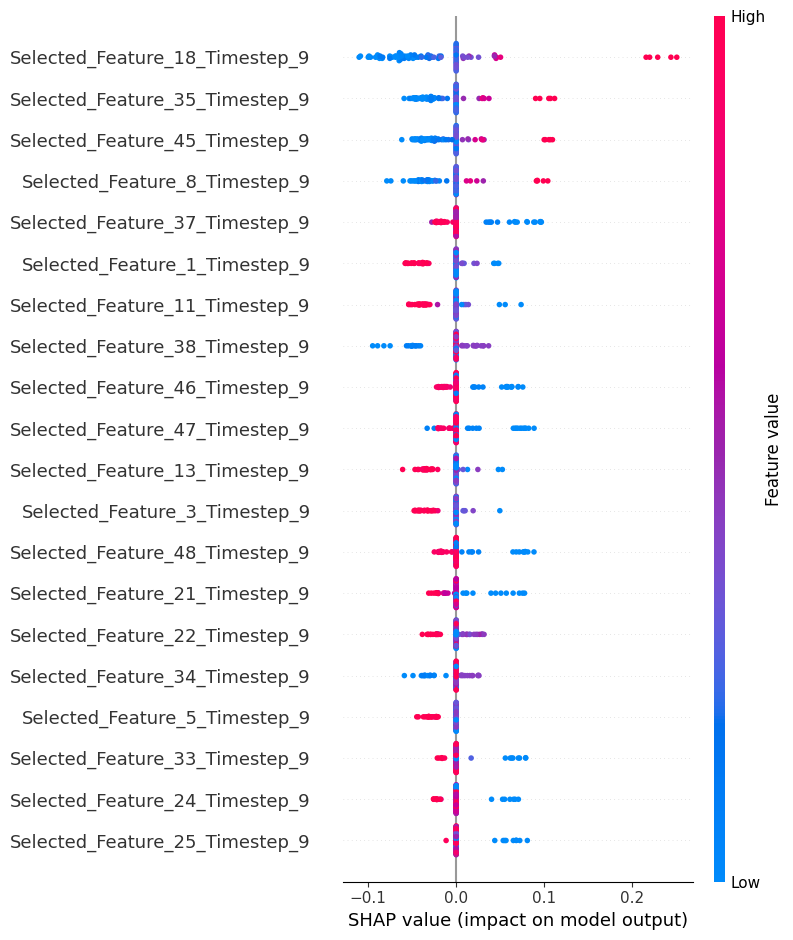

Summary plot generated successfully using KernelExplainer results.


In [130]:
# ipython-input-89-af59945b7e47

import shap
import numpy as np # Ensure numpy is imported if not already
# No need for tensorflow imports or model loading here, as we use KernelExplainer results

shap.initjs()  # Initialize JavaScript for visualizations

# --- Use results from the successful KernelExplainer calculation (from ipython-input-84) ---

# Assuming explainer_kernel, expected_value_kernel, shap_values_flat,
# instance_flat, and feature_names_flat are available from ipython-input-84.
# Ensure ipython-input-84 runs successfully before this cell.

# The KernelExplainer was initialized and SHAP values were calculated for a single instance
# in ipython-input-84. For summary_plot, we need SHAP values for a *batch* of instances.

# The simplest way to fix this is to re-run the KernelExplainer calculation
# in this cell but for a batch of test instances, similar to what was attempted
# with DeepExplainer.

# Ensure X_test_seq is available
if 'X_test_seq' not in globals():
    raise NameError("X_test_seq is not defined. Please run the cells that create X_test_seq.")

# Define seq_length and num_features based on your data shape
# These were defined in ipython-input-84 as well
seq_length_for_explainer = X_test_seq.shape[1] # Should be 10
num_features_for_explainer = X_test_seq.shape[2] # Should be 50

# Redefine the prediction function (needs 'model' and the shape variables)
# Ensure the 'model' is loaded and available from previous cells.
if 'model' not in globals():
     try:
        model = tf.keras.models.load_model("CNN_LSTM_IDS.keras")
        print("Model loaded successfully for explainer function.")
     except Exception as e:
        raise NameError(f"Model is not loaded and failed to load from file: {e}")

def model_predict_fn_reshaped_input(x_flat):
    # x_flat shape is (batch_size, seq_length * num_features)
    # Reshape back to (batch_size, seq_length, num_features)
    x_seq_reshaped = x_flat.reshape(-1, seq_length_for_explainer, num_features_for_explainer)
    # Ensure input has the correct dtype (float32 is common for TF models)
    x_seq_reshaped = tf.cast(x_seq_reshaped, dtype=tf.float32)
    # Model prediction
    # Add verbose=0 to reduce output during SHAP calculation for the batch
    predictions = model.predict(x_seq_reshaped, verbose=0)
    # Ensure output has shape (batch_size,) by removing the last dimension of size 1
    return predictions[:, 0]


# Create background data for KernelExplainer (using training data sequences)
if 'X_train_seq' not in globals():
     raise NameError("X_train_seq is not defined. Please run the cells that create X_train_seq.")

if X_train_seq.shape[0] > 100:
    background_indices_kernel = np.random.choice(X_train_seq.shape[0], 100, replace=False)
    background_data_kernel = X_train_seq[background_indices_kernel]
else:
    background_data_kernel = X_train_seq # Use all if less than 100
background_data_flat = background_data_kernel.reshape(background_data_kernel.shape[0], -1)
print(f"Shape of flattened background data for KernelExplainer: {background_data_flat.shape}")


# Create the Kernel Explainer
try:
    explainer_kernel = shap.KernelExplainer(model_predict_fn_reshaped_input, background_data_flat)
    print("SHAP KernelExplainer initialized successfully.")
    expected_value_kernel = explainer_kernel.expected_value # Get expected value from the explainer

except Exception as e:
    print(f"Error initializing SHAP KernelExplainer for batch prediction: {e}")
    raise e # Re-raise the error


# Compute SHAP values for a batch of instances using the KernelExplainer
# Select a subset of X_test_seq for explanations (e.g., the first 100 sequences)
X_test_subset_seq = X_test_seq[:100] # This should have shape (100, 10, 50)

# Flatten the test subset for KernelExplainer
X_test_subset_seq_flat = X_test_subset_seq.reshape(X_test_subset_seq.shape[0], -1) # Shape (100, 500)
print(f"Shape of flattened test subset for KernelExplainer: {X_test_subset_seq_flat.shape}")

# Calculate SHAP values for this flattened test batch
# KernelExplainer's shap_values returns shape (samples, features)
try:
    # This will take significantly longer than DeepExplainer, especially for many instances/features
    print("Calculating SHAP values for batch using KernelExplainer... This might take time.")
    shap_values_batch_flat = explainer_kernel.shap_values(X_test_subset_seq_flat)
    print("SHAP values calculation complete.")
    print(f"Shape of calculated SHAP values (KernelExplainer batch): {shap_values_batch_flat.shape}")

except Exception as e:
    print(f"Error calculating SHAP values with KernelExplainer for batch: {e}")
    print("The issue likely requires addressing the prediction function or data shape.")
    raise e # Re-raise the error


# --- Visualization ---
# summary_plot expects (samples, features) for SHAP values and data.
# We have shap_values_batch_flat (100, 500) and X_test_subset_seq_flat (100, 500).
# Create feature names for the flattened data (as done for force_plot)
feature_names_flat = [f"Selected_Feature_{j}_Timestep_{i}" for i in range(seq_length_for_explainer) for j in range(num_features_for_explainer)]

# Now call summary_plot with the flattened data and SHAP values
try:
    # Ensure you pass the flattened data X_test_subset_seq_flat as the second argument
    shap.summary_plot(shap_values_batch_flat, X_test_subset_seq_flat, feature_names=feature_names_flat)
    print("Summary plot generated successfully using KernelExplainer results.")

except Exception as e:
    print(f"Error during summary_plot visualization with KernelExplainer results: {e}")
    print("Could not generate summary plot. Check the shapes and types passed to summary_plot.")
    print(f"Shape of SHAP values passed: {shap_values_batch_flat.shape}")
    print(f"Shape of data passed: {X_test_subset_seq_flat.shape}")

Shape of shap_values_batch_flat: (100, 500)
Shape of X_test_subset_seq_flat: (100, 500)
Length of feature_names_flat: 500


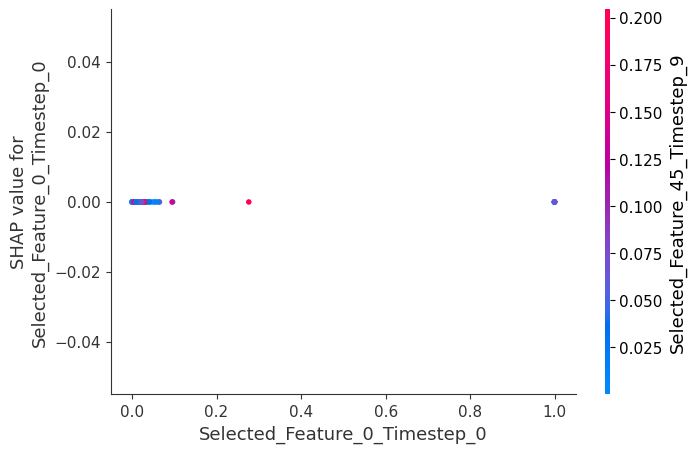

Dependence plot generated successfully for feature index 0.


In [131]:
# ipython-input-91-1790b898436d

# Make sure necessary libraries are imported if not already
import shap
import numpy as np
import matplotlib.pyplot as plt # Recommended for plotting

# --- Use results from the successful KernelExplainer batch calculation (from ipython-input-90) ---

# Assuming explainer_kernel, shap_values_batch_flat, X_test_subset_seq_flat,
# and feature_names_flat are available from ipython-input-90.
# Ensure ipython-input-90 runs successfully before this cell.

# Double-check shapes and types before plotting
if 'shap_values_batch_flat' not in globals():
    raise NameError("shap_values_batch_flat is not defined. Please run the cell ipython-input-90.")
if 'X_test_subset_seq_flat' not in globals():
    raise NameError("X_test_subset_seq_flat is not defined. Please run the cell ipython-input-90.")
if 'feature_names_flat' not in globals():
     # Recreate feature names if not available (based on shapes from ipython-input-90)
     # Need seq_length and num_selected_features
     if 'X_test_seq' not in globals():
         raise NameError("X_test_seq is not defined. Cannot recreate feature_names_flat.")
     seq_length_for_explainer = X_test_seq.shape[1] # Should be 10
     num_features_for_explainer = X_test_seq.shape[2] # Should be 50
     feature_names_flat = [f"Selected_Feature_{j}_Timestep_{i}" for i in range(seq_length_for_explainer) for j in range(num_features_for_explainer)]
     print("Recreated feature_names_flat.")


print(f"Shape of shap_values_batch_flat: {shap_values_batch_flat.shape}")
print(f"Shape of X_test_subset_seq_flat: {X_test_subset_seq_flat.shape}")
print(f"Length of feature_names_flat: {len(feature_names_flat)}")


# The dependence_plot expects:
# 1. feature_index: Index of the feature to plot on the x-axis.
# 2. shap_values: SHAP values array (samples, features).
# 3. features: Data array (samples, features), used for the x-axis values.
# 4. feature_names: List of feature names.

# We have shap_values_batch_flat (100, 500) and X_test_subset_seq_flat (100, 500).
# These shapes are correct for the `shap_values` and `features` arguments.
# The first argument '0' means we are plotting the dependence for the *first* flattened feature (index 0).
# This corresponds to 'Selected_Feature_0_Timestep_0' based on our feature_names_flat definition.

# Call dependence_plot with the corrected variable names and shapes
try:
    # Plot dependence for the first flattened feature (index 0)
    # You can change the index (e.g., 1, 2, 50, 51, 500-1) to see dependence for other features at different timesteps
    feature_to_plot_index = 0 # Example: plot dependence for the first feature at the first timestep

    # Use the correct variable names and shapes
    shap.dependence_plot(
        feature_to_plot_index,           # Index of the feature to plot (e.g., 0 for the first flattened feature)
        shap_values_batch_flat,          # SHAP values (samples, features)
        X_test_subset_seq_flat,          # Data (samples, features)
        feature_names=feature_names_flat # Feature names (list of strings)
    )
    plt.show() # Display the plot

    print(f"Dependence plot generated successfully for feature index {feature_to_plot_index}.")

except Exception as e:
    print(f"Error during dependence_plot visualization: {e}")
    print("Could not generate dependence plot. Check the shapes and types passed.")
    # Print shapes for debugging
    print(f"Shape of feature_index: {type(feature_to_plot_index)}")
    print(f"Shape of shap_values passed: {shap_values_batch_flat.shape}")
    print(f"Shape of features passed: {X_test_subset_seq_flat.shape}")
    print(f"Type of feature_names passed: {type(feature_names_flat)}, length: {len(feature_names_flat)}")

# Note: Visualizing dependence plots for flattened sequential features might be hard to interpret directly.
# A value on the x-axis (e.g., 0.5) for "Selected_Feature_10_Timestep_5" represents the value of
# the 10th selected feature at the 5th timestep in the sequence.

In [132]:
def detect_attack(packet_features, explainer, feature_names):
    # Reshape for LSTM
    packet_features = np.array(packet_features).reshape(1, 1, -1)  # Shape: (1, 1, 115)

    # Predict
    prediction = model.predict(packet_features)
    label = "Attack Detected!" if prediction > 0.5 else "Normal Traffic"

    # Compute SHAP explanation
    shap_values = explainer.shap_values(packet_features)[1]  # Positive class SHAP values

    # Print prediction and explanation
    print(f"Prediction: {label}")
    print("Top contributing features:")
    shap_values_instance = shap_values[0, 0, :]  # Extract feature contributions
    feature_contributions = sorted(zip(feature_names, shap_values_instance), key=lambda x: abs(x[1]), reverse=True)
    for feature, contribution in feature_contributions[:5]:  # Top 5 features
        print(f"{feature}: {contribution:.4f}")

    # Optionally, visualize the explanation
    shap.force_plot(explainer.expected_value[1], shap_values[0], packet_features[0], feature_names=feature_names)

    return label

In [133]:
# Make sure necessary libraries are imported if not already
import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # Import tensorflow for model loading if needed

# Assuming the model, explainer_kernel, and feature_names_flat are available
# from the previous successful cells (e.g., ipython-input-90).

# If 'model' is not defined, load it (assuming it was saved)
if 'model' not in globals():
    try:
       model = tf.keras.models.load_model("CNN_LSTM_IDS.keras")
       print("Model loaded successfully.")
    except Exception as e:
       print(f"Warning: Model not found or failed to load: {e}")
       # You might need to re-run training cells or loading cell if the model isn't available.
       # For this fix, we assume model is available from prior successful steps.

# If 'explainer_kernel' or 'feature_names_flat' are not defined,
# you need to run the cell (ipython-input-90) that calculates them using KernelExplainer.
if 'explainer_kernel' not in globals() or 'feature_names_flat' not in globals():
     raise NameError("explainer_kernel or feature_names_flat not defined. Please run the KernelExplainer cell (ipython-input-90).")


# Redefine the detect_attack function to work with sequences and KernelExplainer
# It should accept a single sequence (shape: (seq_length, num_features))
# and the explainer and feature names for the flattened input.
def detect_attack(packet_sequence, explainer, feature_names_flat, model):
    # packet_sequence shape is (seq_length, num_features) e.g., (10, 50)
    # Reshape the sequence to add a batch dimension for the model prediction
    # The model expects input shape (batch_size, seq_length, num_features)
    packet_sequence_batch = np.array(packet_sequence).reshape(1, packet_sequence.shape[0], packet_sequence.shape[1])

    # Predict using the model
    # Model expects shape (batch_size, timesteps, features)
    prediction_proba = model.predict(packet_sequence_batch, verbose=0) # Use verbose=0 to silence prediction output
    prediction = (prediction_proba > 0.5).astype(int)[0] # Get the single prediction result (0 or 1)
    label = "Attack Detected!" if prediction > 0 else "Normal Traffic"

    # Prepare the sequence for the KernelExplainer (flatten it)
    # Explainer works on flattened input (batch_size, seq_length * num_features)
    packet_sequence_flat = packet_sequence_batch.reshape(1, -1) # Shape (1, 500)

    # Compute SHAP explanation for the flattened sequence
    # explainer.shap_values expects input shape (batch_size, num_flattened_features)
    # It returns shape (batch_size, num_flattened_features) for regression/binary classification
    shap_values_flat = explainer.shap_values(packet_sequence_flat)[0] # KernelExplainer returns a list of one array or an array,
                                                                      # index 0 should be the shap values array.

    # Print prediction and explanation
    print(f"Prediction: {label}")
    print("Top contributing features (across timesteps):")

    # Reshape SHAP values back to (seq_length, num_features) for easier interpretation
    shap_values_sequence = shap_values_flat.reshape(packet_sequence.shape[0], packet_sequence.shape[1])

    # Aggregate SHAP values across timesteps for each original feature
    # Sum the absolute SHAP values for each of the 50 selected features across the 10 timesteps
    aggregated_shap_values = np.sum(np.abs(shap_values_sequence), axis=0) # Shape (num_features,) i.e., (50,)

    # Create feature names for the original 50 selected features (before flattening)
    # Note: We don't know the original names of the 50 features.
    # We'll use generic names like 'Selected_Feature_0' to 'Selected_Feature_49'.
    original_feature_names = [f"Selected_Feature_{j}" for j in range(packet_sequence.shape[1])]

    # Sort original features by their aggregated absolute SHAP contribution
    feature_contributions_aggregated = sorted(zip(original_feature_names, aggregated_shap_values), key=lambda x: x[1], reverse=True)

    for feature, contribution in feature_contributions_aggregated[:10]: # Top 10 original features based on sequence contribution
        # Note: This contribution is the sum of absolute SHAP values across all timesteps for that feature.
        print(f"{feature}: Aggregate Absolute SHAP = {contribution:.4f}")

    # Visualize the explanation using force_plot on the flattened data
    # Force plot expects a single instance's SHAP values and data (shape: (features,))
    shap.initjs() # Ensure JS is initialized before plotting
    print("\nGenerating Force Plot for the entire sequence (flattened view)...")
    # explainer.expected_value is a scalar for KernelExplainer
    shap.force_plot(explainer.expected_value, shap_values_flat, packet_sequence_flat[0], feature_names=feature_names_flat)
    plt.show() # Ensure plot is displayed in some environments

    return label

# --- Call the updated detect_attack function ---

# Example: Extract the first sequence from the test sequences
# X_test_seq has shape (n_sequences_test, seq_length, num_features) e.g., (3589, 10, 50)
# Select the first sequence (index 0). The shape will be (10, 50).
if 'X_test_seq' not in globals():
     raise NameError("X_test_seq not defined. Please run sequence creation cells.")

sample_sequence = X_test_seq[0] # Shape (10, 50)

# Call detect_attack with the sample sequence, explainer, and flattened feature names
detect_attack(sample_sequence, explainer_kernel, feature_names_flat, model)

  0%|          | 0/1 [00:00<?, ?it/s]

Prediction: Normal Traffic
Top contributing features (across timesteps):
Selected_Feature_18: Aggregate Absolute SHAP = 0.0482
Selected_Feature_1: Aggregate Absolute SHAP = 0.0372
Selected_Feature_35: Aggregate Absolute SHAP = 0.0365
Selected_Feature_45: Aggregate Absolute SHAP = 0.0364
Selected_Feature_11: Aggregate Absolute SHAP = 0.0341
Selected_Feature_3: Aggregate Absolute SHAP = 0.0326
Selected_Feature_13: Aggregate Absolute SHAP = 0.0305
Selected_Feature_5: Aggregate Absolute SHAP = 0.0269
Selected_Feature_8: Aggregate Absolute SHAP = 0.0257
Selected_Feature_6: Aggregate Absolute SHAP = 0.0246



Generating Force Plot for the entire sequence (flattened view)...


'Normal Traffic'

In [134]:
# Make sure necessary libraries are imported if not already
import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # Import tensorflow for model loading if needed

# Assuming the model, explainer_kernel, and feature_names_flat are available
# from the previous successful cells (e.g., ipython-input-90).

# If 'model' is not defined, load it (assuming it was saved)
if 'model' not in globals():
    try:
       model = tf.keras.models.load_models("CNN_LSTM_IDS.keras")
       print("Model loaded successfully.")
    except Exception as e:
       print(f"Warning: Model not found or failed to load: {e}")
       # You might need to re-run training cells or loading cell if the model isn't available.
       # For this fix, we assume model is available from prior successful steps.

# If 'explainer_kernel' or 'feature_names_flat' are not defined,
# you need to run the cell (ipython-input-90) that calculates them using KernelExplainer.
if 'explainer_kernel' not in globals() or 'feature_names_flat' not in globals():
     raise NameError("explainer_kernel or feature_names_flat not defined. Please run the KernelExplainer cell (ipython-input-90).")


# Redefine the detect_attack function to work with sequences and KernelExplainer
# It should accept a single sequence (shape: (seq_length, num_features))
# and the explainer and feature names for the flattened input.
def detect_attack(packet_sequence, explainer, feature_names_flat, model):
    # packet_sequence shape is (seq_length, num_features) e.g., (10, 50)
    # Reshape the sequence to add a batch dimension for the model prediction
    # The model expects input shape (batch_size, seq_length, num_features)
    packet_sequence_batch = np.array(packet_sequence).reshape(1, packet_sequence.shape[0], packet_sequence.shape[1])

    # Predict using the model
    # Model expects shape (batch_size, timesteps, features)
    prediction_proba = model.predict(packet_sequence_batch, verbose=0) # Use verbose=0 to silence prediction output
    prediction = (prediction_proba > 0.5).astype(int)[0] # Get the single prediction result (0 or 1)
    label = "Attack Detected!" if prediction > 0 else "Normal Traffic"

    # Prepare the sequence for the KernelExplainer (flatten it)
    # Explainer works on flattened input (batch_size, seq_length * num_features)
    packet_sequence_flat = packet_sequence_batch.reshape(1, -1) # Shape (1, 500)

    # Compute SHAP explanation for the flattened sequence
    # explainer.shap_values expects input shape (batch_size, num_flattened_features)
    # It returns shape (batch_size, num_flattened_features) for regression/binary classification
    shap_values_flat = explainer.shap_values(packet_sequence_flat)[0] # KernelExplainer returns a list of one array or an array,
                                                                      # index 0 should be the shap values array.

    # Print prediction and explanation
    print(f"Prediction: {label}")
    print("Top contributing features (across timesteps):")

    # Reshape SHAP values back to (seq_length, num_features) for easier interpretation
    shap_values_sequence = shap_values_flat.reshape(packet_sequence.shape[0], packet_sequence.shape[1])

    # Aggregate SHAP values across timesteps for each original feature
    # Sum the absolute SHAP values for each of the 50 selected features across the 10 timesteps
    aggregated_shap_values = np.sum(np.abs(shap_values_sequence), axis=0) # Shape (num_features,) i.e., (50,)

    # Create feature names for the original 50 selected features (before flattening)
    # Note: We don't know the original names of the 50 features.
    # We'll use generic names like 'Selected_Feature_0' to 'Selected_Feature_49'.
    original_feature_names = [f"Selected_Feature_{j}" for j in range(packet_sequence.shape[1])]

    # Sort original features by their aggregated absolute SHAP contribution
    feature_contributions_aggregated = sorted(zip(original_feature_names, aggregated_shap_values), key=lambda x: x[1], reverse=True)

    for feature, contribution in feature_contributions_aggregated[:10]: # Top 10 original features based on sequence contribution
        # Note: This contribution is the sum of absolute SHAP values across all timesteps for that feature.
        print(f"{feature}: Aggregate Absolute SHAP = {contribution:.4f}")

    # Visualize the explanation using force_plot on the flattened data
    # Force plot expects a single instance's SHAP values and data (shape: (features,))
    shap.initjs() # Ensure JS is initialized before plotting
    print("\nGenerating Force Plot for the entire sequence (flattened view)...")
    # explainer.expected_value is a scalar for KernelExplainer
    shap.force_plot(explainer.expected_value, shap_values_flat, packet_sequence_flat[0], feature_names=feature_names_flat)
    plt.show() # Ensure plot is displayed in some environments

    return label

# --- Call the updated detect_attack function ---

# Example: Extract the first sequence from the test sequences
# X_test_seq has shape (n_sequences_test, seq_length, num_features) e.g., (3589, 10, 50)
# Select the first sequence (index 0). The shape will be (10, 50).
if 'X_test_seq' not in globals():
     raise NameError("X_test_seq not defined. Please run sequence creation cells.")

sample_sequence = X_test_seq[0] # Shape (10, 50)

# Call detect_attack with the sample sequence, explainer, and flattened feature names
detect_attack(sample_sequence, explainer_kernel, feature_names_flat, model)

  0%|          | 0/1 [00:00<?, ?it/s]

Prediction: Normal Traffic
Top contributing features (across timesteps):
Selected_Feature_18: Aggregate Absolute SHAP = 0.0567
Selected_Feature_3: Aggregate Absolute SHAP = 0.0361
Selected_Feature_1: Aggregate Absolute SHAP = 0.0339
Selected_Feature_35: Aggregate Absolute SHAP = 0.0336
Selected_Feature_8: Aggregate Absolute SHAP = 0.0328
Selected_Feature_11: Aggregate Absolute SHAP = 0.0318
Selected_Feature_5: Aggregate Absolute SHAP = 0.0282
Selected_Feature_45: Aggregate Absolute SHAP = 0.0273
Selected_Feature_13: Aggregate Absolute SHAP = 0.0265
Selected_Feature_44: Aggregate Absolute SHAP = 0.0257



Generating Force Plot for the entire sequence (flattened view)...


'Normal Traffic'